In [1]:
#Iris Flower Classification




In [ ]:
#Import necessary modules for loding dataset

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split   #to split dataset into train and test
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier        #to calculate accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns   # another way of load iris dataset >>> from sklearn.dataset import load_iris 
import warnings
warnings.simplefilter('ignore') #to ignore warnings 
%matplotlib inline

In [53]:
#lode dataset
df=pd.read_csv("C:\\Users\\priya\\Desktop\\Dataset\\iris.csv")


In [54]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
print("Description of iris dataset:> \n\n {}".format(df.describe()))

Description of iris dataset:> 

                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [56]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [57]:
df.values


array([[1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [13, 4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [14, 4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [15, 5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
 

In [58]:
print("Type of the columns of dataset:> \n\n{}".format(df.dtypes))

Type of the columns of dataset:> 

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [59]:
print("Shape of dataset : {}".format(df.shape))

Shape of dataset : (150, 6)


In [60]:
print('Column name : \n{}'.format(df.columns))

Column name : 
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [61]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [62]:
#it show our dataset not cantain any null value

<AxesSubplot:ylabel='count'>

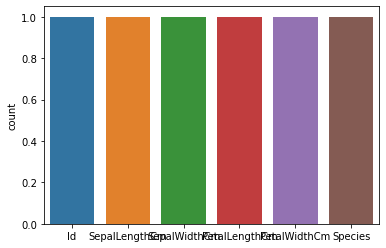

In [63]:
sns.countplot(df.columns)

Text(0.5, 0.98, 'Pairplot of df Dataset')

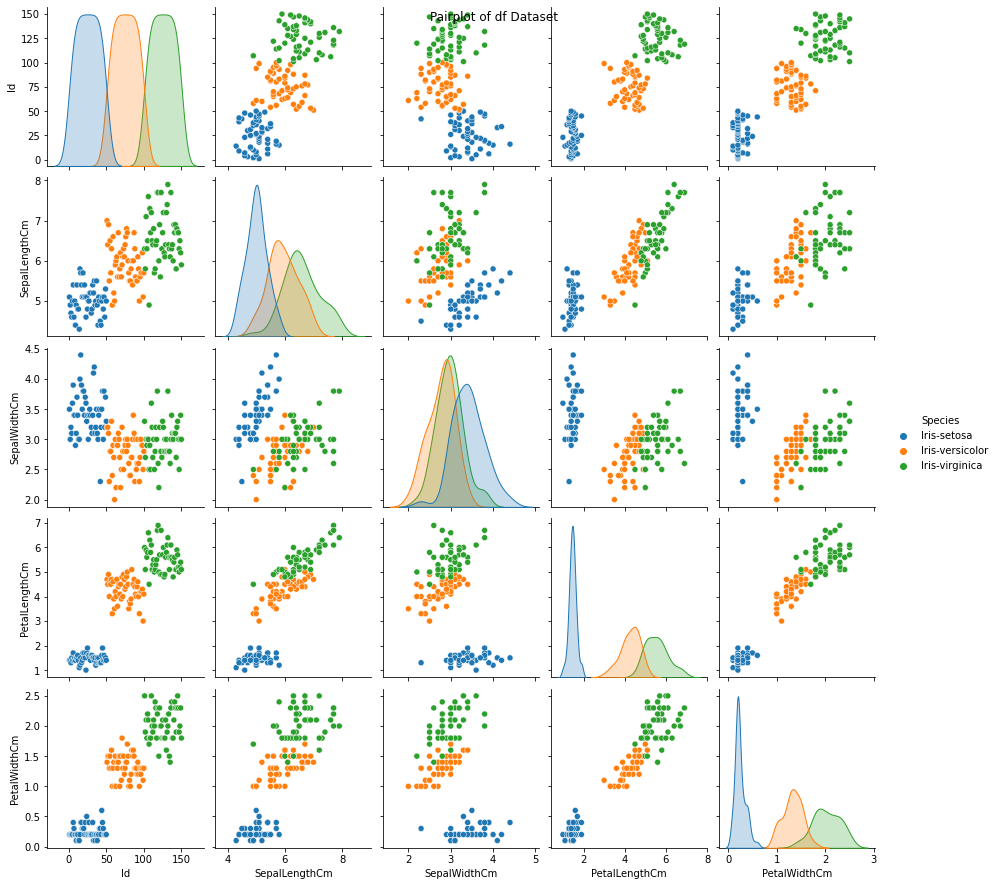

In [72]:
sns.pairplot(df,hue='Species').fig.suptitle('Pairplot of df Dataset')

In [67]:
#X contains independent variables and y contains dependent variables

In [73]:
X = df.drop('Species',axis=1)
y = df['Species']

In [74]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [75]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [77]:
print("Shape of X (Independent Features):{}".format(X.shape))
print("Shape of y (Dependent Features):{}".format(y.shape))

Shape of X (Independent Features):(150, 5)
Shape of y (Dependent Features):(150,)


In [78]:
##Split data into train and test dataset

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of y: {}'.format(y_test.shape))

Shape of X_train: (112, 5)
Shape of X_test: (38, 5)
Shape of y_train: (112,)
Shape of y: (38,)


In [80]:
###KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_test)
knn_y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [82]:
print('Accuracy of KNeighborsClassifier model : {:.2f}'.format(accuracy_score(y_test,knn_y_pred)*100))

Accuracy of KNeighborsClassifier model : 100.00


In [83]:
print("Confusion Matrix :\n {}".format(confusion_matrix(y_test,knn_y_pred)))

Confusion Matrix :
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  8]]


In [84]:
###Logistic Regression 

In [85]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_y_pred = logreg.predict(X_test)
logreg_y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [86]:
print('Accuracy of Logistic Regression model : {:.2f}'.format(accuracy_score(y_test,logreg_y_pred)*100))

Accuracy of Logistic Regression model : 100.00


In [87]:
print("Confusion Matrix :\n {}".format(confusion_matrix(y_test,logreg_y_pred)))

Confusion Matrix :
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  8]]


In [89]:
###Decision Tree Classifier

In [90]:
dct = DecisionTreeClassifier(max_depth=2)
dct.fit(X_train,y_train)
dct_y_pred = dct.predict(X_test)
dct_y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [94]:
print('Accuracy of Decision Tree Classifier model : {:.2f}'.format(accuracy_score(y_test,dct_y_pred)*100))

Accuracy of Decision Tree Classifier model : 100.00


In [96]:
print("Confusion Matrix :\n {}".format(confusion_matrix(y_test,logreg_y_pred)))

Confusion Matrix :
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  8]]


In [ ]:
###Support Vector Classifier (SVC)

In [97]:
svc = SVC()
svc.fit(X_train,y_train)
svc_y_pred = svc.predict(X_test)
svc_y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [98]:
print('Accuracy of SVC model : {:.2f}'.format(accuracy_score(y_test,svc_y_pred)*100))

Accuracy of SVC model : 94.74


In [99]:
print("Confusion Matrix :\n {}".format(confusion_matrix(y_test,svc_y_pred)))

Confusion Matrix :
 [[14  0  0]
 [ 1 14  1]
 [ 0  0  8]]


In [100]:
##Summarization of model

In [103]:
accuracy = {"KNeighborsClassifier":[accuracy_score(y_test,knn_y_pred)*100],"Logistic Regression":[accuracy_score(y_test,logreg_y_pred)*100],
            "Decision Tree Classfier":[accuracy_score(y_test,dct_y_pred)*100],"SVC":[accuracy_score(y_test,svc_y_pred)*100]}
accuracy_df = pd.DataFrame.from_dict(accuracy,orient='index',columns=['Score'])
accuracy_df

,Score
KNeighborsClassifier,100.000000
Logistic Regression,100.000000
Decision Tree Classfier,100.000000
SVC,94.736842
